In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
# in google colab recently I have a problem, to solve this I have to reinstall xlrd (Date: 8 Oct 2022)
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
prices=pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls",sheet_name="Data 1", skiprows=2)

In [3]:
prices.tail(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
8976,2022-09-29,89.41
8977,2022-09-30,88.90
8978,2022-10-03,90.68


In [4]:
prices.head(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [5]:
prices["Brent"]=prices['Europe Brent Spot Price FOB (Dollars per Barrel)']
prices["Month"]=prices["Date"].dt.month
prices["Year"]=prices["Date"].dt.year
prices["Percent_Change"]=prices['Brent'].pct_change()
prices["Price_Change"]=prices['Brent'].diff()

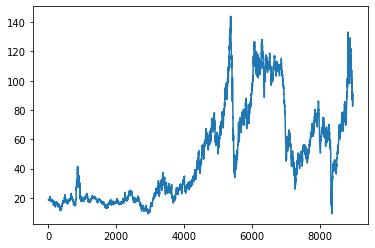

In [6]:
plot(prices["Brent"])

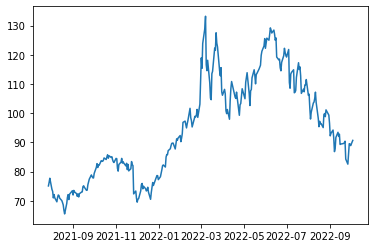

In [10]:
last300days=prices[-300:]
plot(last300days["Date"],last300days["Brent"])

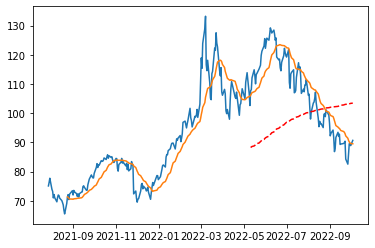

In [15]:
plot(last300days["Date"],last300days["Brent"])
plot(last300days["Date"],last300days["Brent"].rolling(window=200).mean(),"r--", label="200 days AVG")
plot(last300days["Date"],last300days["Brent"].rolling(window=20).mean())

In [7]:
prices.head(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Brent,Month,Year,Percent_Change,Price_Change
0,1987-05-20,18.63,18.63,5,1987,NaN,NaN
1,1987-05-21,18.45,18.45,5,1987,-0.009662,-0.18
2,1987-05-22,18.55,18.55,5,1987,0.005420,0.10


(array([1.000e+00, 1.000e+00, 5.000e+00, 3.500e+01, 7.401e+03, 1.518e+03,
        1.400e+01, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.47465438, -0.3762021 , -0.27774982, -0.17929754, -0.08084526,
         0.01760702,  0.1160593 ,  0.21451158,  0.31296386,  0.41141614,
         0.50986842]),
 <a list of 10 Patch objects>)

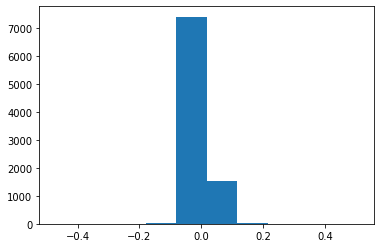

In [16]:
hist(prices.Percent_Change)

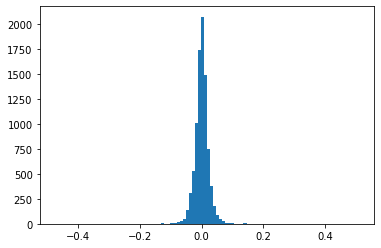

In [19]:
hist(prices.Percent_Change,bins=100);

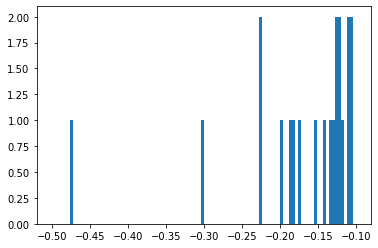

In [28]:
#left part of the tail
hist(prices.Percent_Change,bins=100,range=(-0.5,-0.1));

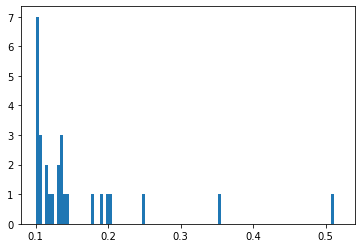

In [29]:
#right part of the tail
hist(prices.Percent_Change,bins=100,range=(0.1,0.52));

In [30]:
prices[(prices.Percent_Change<-0.2)]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Brent,Month,Year,Percent_Change,Price_Change
936,1991-01-17,21.10,21.10,1,1991,-0.303170,-9.18
8328,2020-03-09,35.33,35.33,3,2020,-0.225219,-10.27
8344,2020-03-31,14.85,14.85,3,2020,-0.226159,-4.34
8357,2020-04-21,9.12,9.12,4,2020,-0.474654,-8.24


In [20]:
prices.Percent_Change.max()

0.5098684210526316

In [21]:
prices.Percent_Change.min()

-0.4746543778801844

In [23]:
prices.Percent_Change.describe()

count    8978.000000
mean        0.000499
std         0.025274
min        -0.474654
25%        -0.011056
50%         0.000396
75%         0.012176
max         0.509868
Name: Percent_Change, dtype: float64

In [ ]:
dataselected = prices[(prices.Year==2021) & (prices.Month==3)]   # Year 2020 all data or March 2020
dataselected = prices[(prices.Year==2018) & (prices.Month>9)]   # Year 2018 all data for October, November, December 2018
dataselected = prices[(prices.Month>9)]   # For all years October, November, December
dataselected = prices[((prices.Year==2001) | (prices.Year==2008)) & ((prices.Month==1) | (prices.Month==12))]   # Year 2018 all data for October, November, December 2018


Read all the worldbank commodity data

In [ ]:
wb_pinksheet="https://thedocs.worldbank.org/en/doc/5d903e848db1d1b83e0ec8f744e55570-0350012021/related/CMO-Historical-Data-Monthly.xlsx"
prices=pd.read_excel(wb_pinksheet,sheet_name="Monthly Prices" , skiprows=[0,1,2,3,5], index_col=0)


In [ ]:
prices

,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
1960M01,1.630000,1.63,1.63,…,…,…,0.1400,0.404774,…,…,...,511.471832,11.42,715.40,206.10,2180.40,1631.00,260.80,35.27,83.50,0.9137
1960M02,1.630000,1.63,1.63,…,…,…,0.1400,0.404774,…,…,...,511.471832,11.42,728.19,203.70,2180.40,1631.00,244.90,35.27,83.50,0.9137
1960M03,1.630000,1.63,1.63,…,…,…,0.1400,0.404774,…,…,...,511.471832,11.42,684.94,210.30,2173.80,1631.00,248.70,35.27,83.50,0.9137
1960M04,1.630000,1.63,1.63,…,…,…,0.1400,0.404774,…,…,...,511.471832,11.42,723.11,213.60,2178.20,1631.00,254.60,35.27,83.50,0.9137
1960M05,1.630000,1.63,1.63,…,…,…,0.1400,0.404774,…,…,...,511.471832,11.42,684.75,213.40,2162.70,1631.00,253.80,35.27,83.50,0.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022M05,110.096667,112.37,108.32,109.6,..,280,8.1373,29.170723,16.679091,248.791065,...,2830.320000,131.21,9377.15,2142.48,35769.39,28062.55,3751.48,1848.50,958.38,21.9050
2022M06,116.800000,120.08,115.73,114.59,..,313.457727,7.6740,33.557731,15.533921,263.244911,...,2563.440000,130.74,9024.46,2066.38,31559.31,25658.63,3629.73,1836.57,956.59,21.5560
2022M07,105.083333,108.92,106.48,99.85,..,329.817619,7.2561,51.330030,18.880754,344.926676,...,2408.420000,108.57,7544.81,1985.20,25395.77,21481.89,3105.36,1732.74,869.25,19.0750
2022M08,95.973333,98.60,97.75,91.57,..,318.275652,8.7854,70.043640,21.210848,454.040143,...,2430.790000,108.85,7981.84,2072.72,24647.48,22057.39,3587.57,1764.56,908.65,19.7240


In [ ]:
prices.tail(5)

,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
2022M05,110.096667,112.37,108.32,109.6,..,280,8.1373,29.170723,16.679091,248.791065,...,2830.32,131.21,9377.15,2142.48,35769.39,28062.55,3751.48,1848.50,958.38,21.905
2022M06,116.800000,120.08,115.73,114.59,..,313.457727,7.6740,33.557731,15.533921,263.244911,...,2563.44,130.74,9024.46,2066.38,31559.31,25658.63,3629.73,1836.57,956.59,21.556
2022M07,105.083333,108.92,106.48,99.85,..,329.817619,7.2561,51.330030,18.880754,344.926676,...,2408.42,108.57,7544.81,1985.20,25395.77,21481.89,3105.36,1732.74,869.25,19.075
2022M08,95.973333,98.60,97.75,91.57,..,318.275652,8.7854,70.043640,21.210848,454.040143,...,2430.79,108.85,7981.84,2072.72,24647.48,22057.39,3587.57,1764.56,908.65,19.724
2022M09,88.220000,90.16,90.63,83.87,..,321.475909,7.7629,59.102622,21.699008,389.940974,...,2228.09,99.80,7749.00,1868.10,21145.47,22857.87,3130.24,1680.78,881.24,18.944


In [ ]:
dataselected=prices.iloc[-150:,:]
#dataselected=dataselected.dropna(axis=1) 
dataselected=dataselected.replace('..',0)
dataselected=dataselected.applymap(float);


In [ ]:
dataselected.head(2)

,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
2010M04,84.182857,84.978571,83.092381,84.477619,100.15,88.7000,4.0059,7.52,10.98,91.833895,...,2316.725,172.47,7745.075,2264.850,18683.500,26030.750,2366.675,1148.688,1710.50,18.0623
2010M05,75.618317,76.250952,76.874000,73.730000,100.13,90.9375,4.1560,7.27,11.39,92.745895,...,2040.526,161.35,6837.684,1882.684,17566.053,22008.158,1968.368,1205.434,1624.86,18.4333


In [ ]:
dataselected.corr()

,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
"Crude oil, average",1.000000,0.998004,0.998087,0.991454,0.165668,0.440279,0.574237,0.460524,0.831728,0.529472,...,0.501437,0.588590,0.675380,0.466106,0.486720,0.673213,-0.004266,0.258998,0.730404,0.639473
"Crude oil, Brent",0.998004,1.000000,0.998743,0.981887,0.173847,0.423992,0.550368,0.443169,0.833107,0.510267,...,0.488547,0.586850,0.668586,0.466375,0.469757,0.659200,-0.023104,0.265157,0.739019,0.661699
"Crude oil, Dubai",0.998087,0.998743,1.000000,0.982209,0.168609,0.428970,0.554493,0.452036,0.840179,0.518375,...,0.486723,0.584660,0.667380,0.455706,0.466120,0.660133,-0.016514,0.269777,0.728712,0.648972
"Crude oil, WTI",0.991454,0.981887,0.982209,1.000000,0.150741,0.466092,0.616538,0.484156,0.809858,0.557271,...,0.526327,0.587353,0.683430,0.471371,0.523111,0.695344,0.031336,0.236428,0.712813,0.594763
"Coal, Australian",0.165668,0.173847,0.168609,0.150741,1.000000,-0.153382,-0.087282,-0.146029,-0.023145,-0.134631,...,0.315857,0.331852,0.393122,0.484593,0.309824,0.109039,0.057638,0.062021,0.287225,0.343178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nickel,0.673213,0.659200,0.660133,0.695344,0.109039,0.652741,0.629693,0.550930,0.519175,0.600138,...,0.799221,0.734431,0.835932,0.489667,0.706811,1.000000,0.315860,0.509022,0.544865,0.612382
Zinc,-0.004266,-0.023104,-0.016514,0.031336,0.057638,0.644799,0.409893,0.484431,-0.074615,0.470622,...,0.682078,0.076424,0.428766,0.513550,0.617963,0.315860,1.000000,0.333530,-0.414981,-0.092091
Gold,0.258998,0.265157,0.269777,0.236428,0.062021,0.472904,0.205077,0.418203,0.238314,0.381217,...,0.506153,0.600173,0.632004,0.140006,0.532685,0.509022,0.333530,1.000000,0.079786,0.612180
Platinum,0.730404,0.739019,0.728712,0.712813,0.287225,-0.024129,0.233278,0.015216,0.527752,0.090943,...,0.233645,0.631338,0.507184,0.361003,0.203274,0.544865,-0.414981,0.079786,1.000000,0.741826


In [ ]:
priceset=dataselected.iloc[:,[1,2,3,4,5,6,7,8]]                


In [ ]:
priceset

,"Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan"
2010M04,84.978571,83.092381,84.477619,100.1500,88.700000,4.0059,7.520000,10.980000
2010M05,76.250952,76.874000,73.730000,100.1300,90.937500,4.1560,7.270000,11.390000
2010M06,74.838182,73.983182,75.353636,98.1875,92.812500,4.7948,7.740000,10.480000
2010M07,74.735455,72.652273,76.350476,95.9800,90.610000,4.6266,8.040000,11.320000
2010M08,76.693182,74.183810,76.601818,89.7800,87.900000,4.3050,8.450000,11.300000
...,...,...,...,...,...,...,...,...
2022M05,112.370000,108.320000,109.600000,0.0000,280.000000,8.1373,29.170723,16.679091
2022M06,120.080000,115.730000,114.590000,0.0000,313.457727,7.6740,33.557731,15.533921
2022M07,108.920000,106.480000,99.850000,0.0000,329.817619,7.2561,51.330030,18.880754
2022M08,98.600000,97.750000,91.570000,0.0000,318.275652,8.7854,70.043640,21.210848


In [ ]:
priceset.columns=["CRUDE_BRENT","CRUDE_DUBAI","CRUDE_WTI","COAL_AUS","COAL_SAFRICA","NGAS_US","NGAS_EUR","NGAS_JP"]

#priceset=prices[["CRUDE_PETRO","CRUDE_BRENT","CRUDE_DUBAI","CRUDE_WTI","COAL_AUS","COAL_SAFRICA","NGAS_US","NGAS_EUR","NGAS_JP"]]                


priceset=priceset.applymap(float); # convert to float all numbers
# ----------------------------------------------------------------------------------------------------

# see the first two rows of the dataselected
# head command ->  head(#number of rows)
priceset.tail(2)



,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP
2022M08,98.60,97.75,91.57,0.0,318.275652,8.7854,70.043640,21.210848
2022M09,90.16,90.63,83.87,0.0,321.475909,7.7629,59.102622,21.699008


In [ ]:
coal2kwh=7000
mmbtu2kwh=293
barrel2kwh=1699

#now the efficiencies   ------dont change this---------------
effcoal=0.35
effgas=0.52
effoil=0.43
#------------
# electricity produced from coal, oil, gas
kwhfromcoal= coal2kwh*effcoal
kwhfromgas=mmbtu2kwh*effgas
kwhfromoil=barrel2kwh*effoil


In [ ]:

#now let's create electricity costs from these resources
#since prices are cent/kWh we will convert $ to cent by multiplying by 100

# electricity cost from oil
priceset["O40_BRENT"]= priceset['CRUDE_BRENT']*100/kwhfromoil
priceset["O40_DUBAI"]= priceset['CRUDE_DUBAI']*100/kwhfromoil
priceset["O40_WTI"]= priceset['CRUDE_WTI']*100/kwhfromoil

# electricity cost from coal
priceset["C35_AUS"]= priceset['COAL_AUS']*100/kwhfromcoal
priceset["C35_SAFRICA"]= priceset['COAL_SAFRICA']*100/kwhfromcoal


#electricity cost from natural gas
priceset["N52_US"]= priceset['NGAS_US']*100/kwhfromgas
priceset["N52_EUR"]= priceset['NGAS_EUR']*100/kwhfromgas
priceset["N52_JP"]= priceset['NGAS_JP']*100/kwhfromgas



Text(0, 0.5, 'cent/kWh')

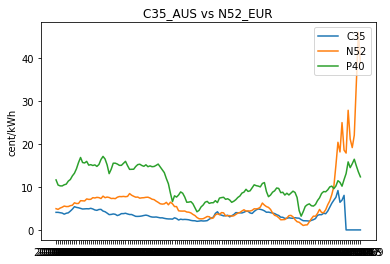

In [ ]:
# now plot various graphs
plot(priceset.C35_AUS,label="C35")
plot(priceset.N52_EUR,label="N52")
plot(priceset.O40_BRENT,label="P40")
legend(loc="upper right")
title("C35_AUS vs N52_EUR")
ylabel("cent/kWh")


#BP data

In [ ]:
#https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2022-consolidated-dataset-narrow-format.csv
bp_xlsx = 'https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2022-consolidated-dataset-narrow-format.xlsx'
df = pd.read_excel(bp_xlsx,'BP Statistical Review 2022')

In [ ]:
df.columns

Index(['Country', 'Year', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'Var', 'Value'],
      dtype='object')

In [ ]:
df.Country.unique()

array(['Brazil', 'Other North America', 'Other S. & Cent. America',
       'Other South America', 'Total Asia Pacific', 'Total CIS',
       'Total EU', 'Total Europe', 'Total Middle East', 'Total Non-OECD',
       'Total North America', 'Total OECD', 'Total S. & Cent. America',
       'Total World', 'US', 'Total Africa', 'Argentina', 'Australia',
       'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada', 'China',
       'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Other Africa', 'Other Asia Pacific', 'Other Caribbean',
       'Other Europe', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'S

In [ ]:
df.Var.unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'gasre

In [ ]:
dataset= df[(df.Country=="Turkey") & (df.Var=="hydro_twh")]

Text(0, 0.5, 'TWh')

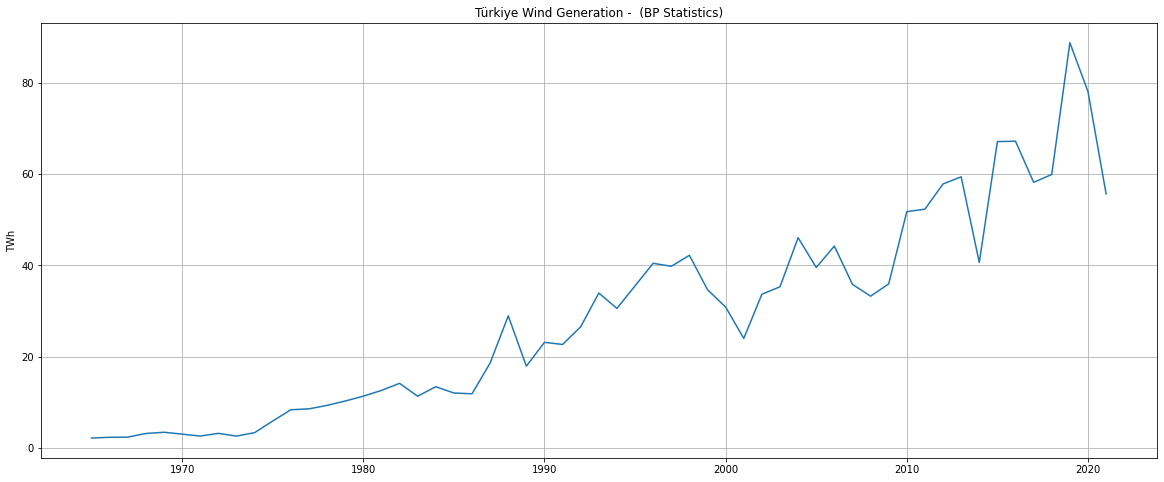

In [ ]:
plot(dataset.Year, dataset.Value, figure=figsize(20,8))

title("Türkiye Wind Generation -  (BP Statistics)")
grid("on")
ylabel("TWh")

In [ ]:
for i in df.Var.unique():
  print(i)

In [ ]:
clear_output()

NameError: ignored

Dropdown(description='Country selection:', index=75, options=('Brazil', 'Other North America', 'Other S. & Cen…

Dropdown(description='Graph selection:', index=65, options=('biodiesel_cons_kboed', 'biodiesel_cons_pj', 'biod…

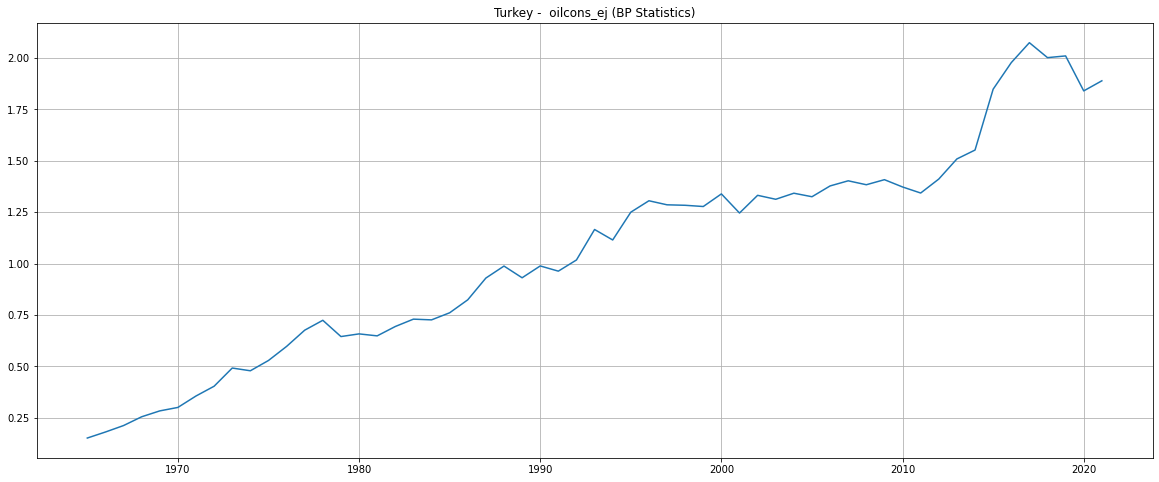

In [ ]:
from traitlets.traitlets import default
from IPython.display import display, clear_output
from ipywidgets import Dropdown

def dropdown_eventhandler(change):
  clear_output()
  dataset= df[(df.Country==dropdown.value) & (df.Var==dropdown2.value)]
  #print(change.new)
  #print(dropdown.value+ "   "+dropdown2.value)
  plot(dataset.Year, dataset.Value, figure=figsize(20,8))
  title(dropdown.value + " -  "+dropdown2.value+" (BP Statistics)")
  grid("on")
  display(dropdown,dropdown2)


dropdown = Dropdown(description="Country selection:", options=df.Country.unique(),value="Turkey")
dropdown2 = Dropdown(description="Graph selection:", options=df.Var.unique(),value="elect_twh")

dropdown.observe(dropdown_eventhandler, names='value')
dropdown2.observe(dropdown_eventhandler, names='value')

clear_output()
display(dropdown,dropdown2)